# Traffic Sign Classification with Keras

### 1. Load the Dataset

In [5]:
import numpy as np
from skimage import io, color, exposure, transform
from sklearn.cross_validation import train_test_split
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

NUM_CLASSES = 43
IMG_SIZE = 48

import pickle
import keras
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

from collections import defaultdict

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

NUM_CLASSES = 43
IMG_SIZE = 48

In [6]:
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image

n_train = len(X_train)
n_y_train = len(y_train)

n_validation = len(X_valid)

n_test = len(X_test)

image_shape = X_train[0].shape[1]
print("Number of training examples =", n_y_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
X_train.shape

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = 32


(34799, 32, 32, 3)

In [77]:
perm = np.arange(X_train.shape[0])
np.random.shuffle(perm)
X_train = X_train[perm]
y_train = y_train[perm]


### 2. Data Exploration

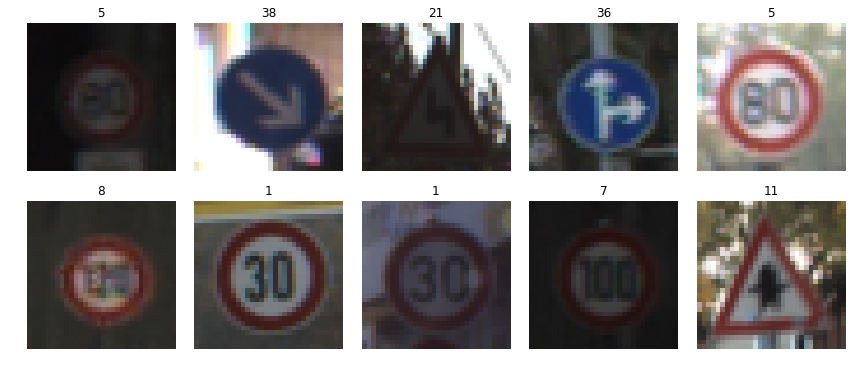

In [78]:
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

### 3. Preprocessing
1. Normalize the image data with Min-Max scaling to a range of [-0.5,0.5]
2. One-hot encode the labels y.

In [79]:
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-0.5,0.5]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a=-0.5
    b=0.5
    grayscale_min = 0
    grayscale_max = 255
    return a + (((image_data - grayscale_min)*(b-a))/(grayscale_max - grayscale_min))

X_normalized = normalize_grayscale(X_train)

In [80]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()

y_one_hot = label_binarizer.fit_transform(y_train)

## Step 2: Design and Test a Model Architecture

#### Build Keras Sequential Model
Use Keras functional API to build a sequential network architecture
Keras will automatically infer the shape of all layers after the first layer. This means you only have to set the input dimensions for the first layer.

In [81]:
from keras.layers.core import Flatten, Dense, Activation
from keras.models import Sequential
model = Sequential()
# TODO: Build a Multi-layer feedforward neural network with Keras here.
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))

In [82]:
from keras.layers.core import Dense, Activation, Flatten
from keras.activations import relu, softmax

def check_layers(layers, true_layers):
    assert len(true_layers) != 0, 'No layers found'
    for layer_i in range(len(layers)):
        assert isinstance(true_layers[layer_i], layers[layer_i]), 'Layer {} is not a {} layer'.format(layer_i+1, layers[layer_i].__name__)
    assert len(true_layers) == len(layers), '{} layers found, should be {} layers'.format(len(true_layers), len(layers))

check_layers([Flatten, Dense, Activation, Dense, Activation], model.layers)

assert model.layers[0].input_shape == (None, 32, 32, 3), 'First layer input shape is wrong, it should be (32, 32, 3)'
assert model.layers[1].output_shape == (None, 128), 'Second layer output is wrong, it should be (128)'
assert model.layers[2].activation == relu, 'Third layer not a relu activation layer'
assert model.layers[3].output_shape == (None, 43), 'Fourth layer output is wrong, it should be (43)'
assert model.layers[4].activation == softmax, 'Fifth layer not a softmax activation layer'
print('Tests passed.')


Tests passed.


### Train the network
1.Compile the network using adam optimizer and categorical_crossentropy loss function.

2.Train the network for ten epochs and validate with 20% of the training data.


In [84]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_normalized, y_one_hot, nb_epoch=10, validation_split=0.2)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 27839 samples, validate on 6960 samples
Epoch 1/10
27839/27839 [==============================] - 5s - loss: 0.2477 - acc: 0.9283 - val_loss: 0.2313 - val_acc: 0.9424
Epoch 2/10
27839/27839 [==============================] - 4s - loss: 0.2278 - acc: 0.9323 - val_loss: 0.3310 - val_acc: 0.9056
Epoch 3/10
27839/27839 [==============================] - 4s - loss: 0.2407 - acc: 0.9306 - val_loss: 0.2598 - val_acc: 0.9342
Epoch 4/10
27839/27839 [==============================] - 4s - loss: 0.2136 - acc: 0.9376 - val_loss: 0.2431 - val_acc: 0.9342
Epoch 5/10
27839/27839 [==============================] - 5s - loss: 0.2104 - acc: 0.9399 - val_loss: 0.2663 - val_acc: 0.9326
Epoch 6/10
27839/27839 [==============================] - 5s - loss: 0.2086 - acc: 0.9386 - val_loss: 0.3190 - val_acc: 0.9091
Epoch 7/10
27839/27839 [==============================] - 5s - loss: 0.1876 - acc: 0.9462 - val_loss: 0.2837 - val_acc: 0.9205
Epoch 8/10
27839/27839 [==============================] - 4s -

### Convolutions
1.Re-construct the previous network

2.Add a convolutional layer with 32 filters, a 3x3 kernel, and valid padding before the flatten layer.

3.Add a ReLU activation after the convolutional layer.

In [85]:
from keras.layers.core import Dense, Activation, Flatten
from keras.activations import relu, softmax
from keras.layers import Convolution2D

nb_classes = 43
nb_epoch = 10

# Image Processing Constants
NB_ROWS, NB_COLS, NB_CHANNELS = (32, 32, 3)
IMG_SHAPE = (NB_ROWS, NB_COLS, NB_CHANNELS) if NB_CHANNELS > 1 else (NB_ROWS, NB_COLS)

# Convolutional HyperParameters
nb_filters = 32
kernel_size = (3,3)

model = Sequential()
#Add Convolution Here
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], 
                        input_shape=IMG_SHAPE, border_mode='valid'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(43))
model.add(Activation('softmax'))

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(32, 32, 3...)`


In [86]:
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D

check_layers([Convolution2D, Activation, Flatten, Dense, Activation, Dense, Activation], model.layers)


model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_normalized, y_one_hot, batch_size=128, nb_epoch=2, validation_split=0.2)
assert(history.history['val_acc'][-1] > 0.91), "The validation accuracy is: %.3f.  It should be greater than 0.91" % history.history['val_acc'][-1]
print('Tests passed.')

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 27839 samples, validate on 6960 samples
Epoch 1/2
27839/27839 [==============================] - 21s - loss: 1.3580 - acc: 0.6600 - val_loss: 0.4895 - val_acc: 0.8747
Epoch 2/2
27839/27839 [==============================] - 20s - loss: 0.3210 - acc: 0.9219 - val_loss: 0.2448 - val_acc: 0.9405
Tests passed.


### Pooling

1. Add a 2x2 max pooling layer immediately following your convolutional layer.

In [87]:
from keras.layers.core import Dense,Activation,Flatten
from keras.activations import relu, softmax
from keras.layers import Convolution2D, MaxPooling2D

nb_classes = 43
nb_epoch = 10
NB_ROWS, NB_COLS, NB_CHANNELS = (32,32,3)
IMG_SHAPE = (NB_ROWS, NB_COLS, NB_CHANNELS) if NB_CHANNELS > 1 else (NB_ROWS,NB_COLS)
nb_filters = 32
kernel_size = (3,3)
model = Sequential()
model.add(Convolution2D(nb_filters, kernel_size[0],kernel_size[1],input_shape=IMG_SHAPE,border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(32, 32, 3...)`
  if sys.path[0] == '':


In [88]:
model.compile('adam', 'categorical_crossentropy',['accuracy'])
history = model.fit(X_normalized, y_one_hot,batch_size = 128, epochs = 2,validation_split = 0.2)


Train on 27839 samples, validate on 6960 samples
Epoch 1/2
27839/27839 [==============================] - 13s - loss: 1.6153 - acc: 0.5744 - val_loss: 0.7063 - val_acc: 0.8006
Epoch 2/2
27839/27839 [==============================] - 12s - loss: 0.4909 - acc: 0.8791 - val_loss: 0.3665 - val_acc: 0.9119


### Train, Validate and Test the Final Model

Finally, reconstruct the network and do the last step:
#### Add a dropout layer after the pooling layer. Set the dropout rate to 50%.

In [89]:
from keras.layers.core import Dense,Activation,Flatten
from keras.activations import relu, softmax
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.models import Input, Model
a = Input((32,32,3))
x = Convolution2D(nb_filters, kernel_size[0], kernel_size[1],border_mode='valid') (a)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.50)(x)
x = Activation('relu')(x)
x = Flatten()(x)
x = Dense(128)(x)
x = Activation('relu')(x)
x = Dense(43)(x)
x = Activation('softmax')(x)
out = Model(a,x )

out.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
out.fit(X_normalized, y_one_hot, batch_size=128, nb_epoch=3, validation_split=0.2)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid")`
  
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 27839 samples, validate on 6960 samples
Epoch 1/3
27839/27839 [==============================] - 14s - loss: 1.6602 - acc: 0.5714 - val_loss: 0.6582 - val_acc: 0.8499
Epoch 2/3
27839/27839 [==============================] - 13s - loss: 0.5185 - acc: 0.8664 - val_loss: 0.3199 - val_acc: 0.9303
Epoch 3/3
27839/27839 [==============================] - 13s - loss: 0.3030 - acc: 0.9248 - val_loss: 0.2151 - val_acc: 0.9520


### Step 3: Test a Model on New Images

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(5, 32, 32, 3)

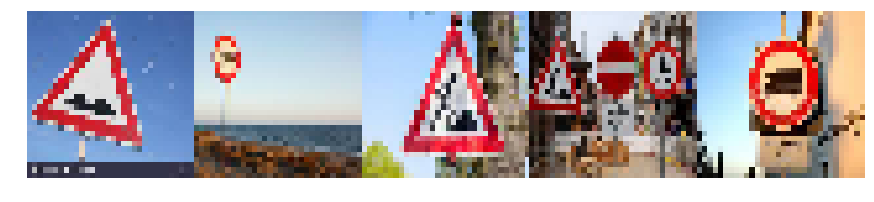

In [90]:
from skimage.io import imread_collection

#your path 
col_dir = 'test_img/*.jpg'

#creating a collection with the available images
col = imread_collection(col_dir)

my_images = []

fig, axs = plt.subplots(1,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    image = col[i]
    image = resize(image,(32,32))
    axs[i].axis('off')
    axs[i].imshow(image)
    my_images.append(image)

my_images = np.asarray(my_images)
my_images.shape

In [ ]:
nb_epoch = 10
batch_size = 128
nb_classes = 43


# Image Processing Constants
NB_ROWS, NB_COLS, NB_CHANNELS = (32, 32, 3)
IMG_SHAPE = (NB_ROWS, NB_COLS, NB_CHANNELS) if NB_CHANNELS > 1 else (NB_ROWS, NB_COLS)

# Convolutional HyperParameters
nb_filters = 32
kernel_size = (3,3)

model = Sequential()
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], 
                        input_shape=IMG_SHAPE, border_mode='valid'))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], 
                        input_shape=IMG_SHAPE, border_mode='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))


# TODO: Compile and train the model
model.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['accuracy'])

model.fit(X_normalized, y_one_hot, batch_size=batch_size,
         nb_epoch=nb_epoch, validation_split=0.222)



### Predict the Sign Type for Each Image

In [113]:
y = [22 ,2,25, 17,16]
y_test_one_hot = np.eye(43)[y]
X_test_normalized = normalize_grayscale(my_images)
predictions = model.predict( X_test_normalized, batch_size=5)
class_predictions = model.predict_classes(X_test_normalized, batch_size=5)

sess = tf.Session()
print("Predictions:", sess.run(tf.nn.top_k(tf.constant(predictions), k=5)))
sess.close()
print("Class predictions: ", class_predictions)

5/5 [==============================] - 0s
Predictions: TopKV2(values=array([[0.12253761, 0.10780171, 0.09129338, 0.08925914, 0.08430965],
       [0.12814397, 0.12498648, 0.12057956, 0.08437131, 0.06793941],
       [0.1570053 , 0.11832445, 0.11699283, 0.06727394, 0.06163668],
       [0.1284184 , 0.12246139, 0.10545856, 0.06967688, 0.06417745],
       [0.15442276, 0.13004853, 0.09524234, 0.07418149, 0.06288607]],
      dtype=float32), indices=array([[25, 19, 26, 13,  9],
       [26, 25, 19, 13,  9],
       [25, 26, 19, 13,  5],
       [26, 19, 25, 13,  9],
       [26, 25, 19, 13, 12]], dtype=int32))
Class predictions:  [25 26 25 26 26]


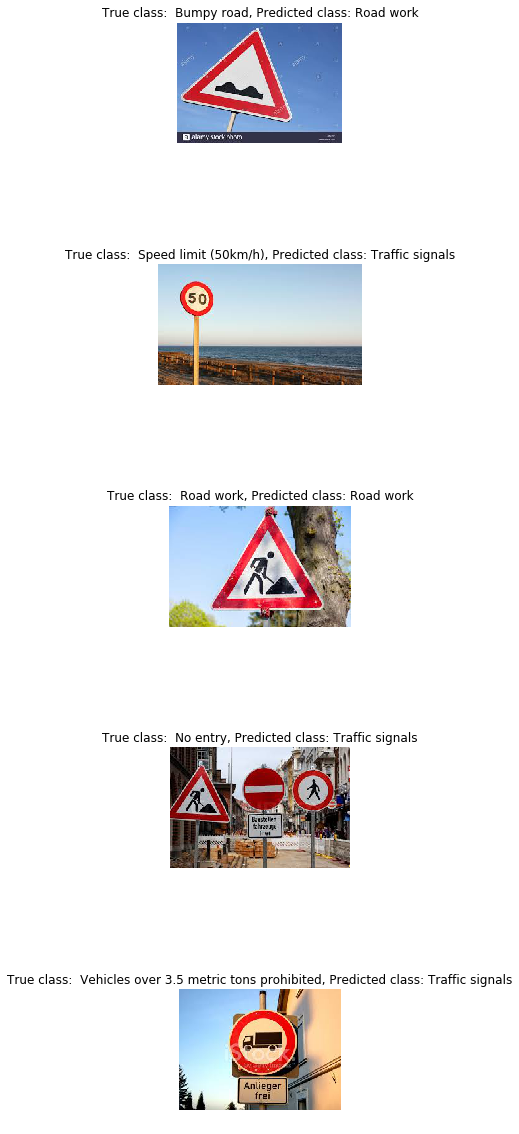

In [110]:
from pandas.io.parsers import read_csv

signnames = read_csv("signnames.csv").values[:, 1]


fig, axs = plt.subplots(5,1, figsize=(20, 20))
fig.subplots_adjust(hspace = 1, wspace= 1)
axs = axs.ravel()
for i in range(5):
    image = col[i]
    predicted_name = signnames[class_predictions[i]]
    correct_name = signnames[y[i]]
    axs[i].axis('off')
    axs[i].imshow(image)
    a = "True class:  {}, Predicted class: {}".format(correct_name,predicted_name)
    axs[i].set_title(a)


### Analyze Performance

In [114]:
score = model.evaluate(X_test_normalized, y_test_one_hot, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 6.764933109283447
Test accuracy: 0.20000000298023224
